# Shifted Griewank's function minimization

The goal is to optimize (minimize more precisely) the shifted-Griewank's cost function

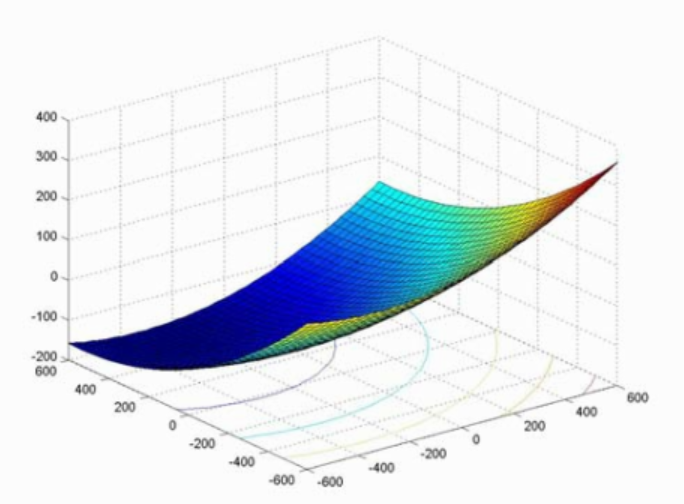

In [1]:
# Import necessaries librairies
import numpy as np
from functools import reduce
import operator
import math
from math import cos,pi,sqrt
import matplotlib.pyplot as plt
from scipy.optimize import minimize,dual_annealing
# if not installed
#!pip install autograd
from autograd import grad, jacobian
import time

In [22]:
#Define a bias for the function
f_bias = -180
d50 = 50
shift  = np.random.uniform(-600,600,d50)

In [3]:
def shifted_griewank(x):
    """Shifted-Griewank objective function.

    Has a global minimum at -180 (because of the bias we added).

    Parameters
    ----------
    x : numpy.ndarray
        The input of the function

    Returns a numpy.ndarray"""
    z = x - shift
    sum = 1.0
    innerSum = 0.0
    innerProduct = 1.0
    for i in range(len(z)):
        innerSum += z[i] ** 2
        innerProduct *= np.cos(z[i] / np.sqrt(i + 1))
    sum += innerSum * (1.0 / 4000.0) - innerProduct
    return sum + f_bias

In [4]:
MAX_ITER = 2000

In [5]:
# Define a random initial solution for dimension 50
x_0_50 = np.random.uniform(-600,600,d50)

In [6]:
# Define the boundairies of the shifted sphere function
min_bound_50 = -600 * np.ones(d50)
max_bound_50 = 600 * np.ones(d50)
bounds_50 = list(zip(min_bound_50, max_bound_50))

In [38]:
# Define a callback this will helps to plot our results
history = []
def callbackf(x):
    fobj = shifted_griewank(x)
    history.append(fobj)

In [24]:
#Set maximum number of iterations
MAX_ITER = 2000

In [25]:
start_time = time.time()
res_50 = minimize(shifted_griewank,x0=x_0_50,method='BFGS',callback = callbackf, options={'disp': True, 'maxiter': MAX_ITER})
res_50
print("--- %s seconds ---" % (time.time() - start_time))

Optimization terminated successfully.
         Current function value: -180.000000
         Iterations: 41
         Function evaluations: 2600
         Gradient evaluations: 50
--- 0.8955466747283936 seconds ---


In [10]:
#Print result of the optimization for the Griewank function (dimension 50) 
res_50

      fun: -179.99999999785
 hess_inv: array([[ 0.7788956 ,  0.08186892, -0.02672088, ...,  0.01755561,
         0.03527203,  0.01347978],
       [ 0.08186892,  1.65427069, -0.09133199, ...,  0.03531477,
         0.15417282, -0.27386808],
       [-0.02672088, -0.09133199,  2.30155588, ..., -0.02986397,
        -0.11226269,  0.19759452],
       ...,
       [ 0.01755561,  0.03531477, -0.02986397, ...,  1.35710151,
         0.80599001, -0.89185517],
       [ 0.03527203,  0.15417282, -0.11226269, ...,  0.80599001,
         2.84428634, -2.09932562],
       [ 0.01347978, -0.27386808,  0.19759452, ..., -0.89185517,
        -2.09932562,  3.54355323]])
      jac: array([ 5.72204590e-06,  3.81469727e-06, -3.81469727e-06,  1.90734863e-06,
       -7.62939453e-06,  7.62939453e-06,  3.81469727e-06, -7.62939453e-06,
        0.00000000e+00, -1.90734863e-06,  5.72204590e-06,  1.90734863e-06,
        3.81469727e-06,  0.00000000e+00, -1.90734863e-06, -3.81469727e-06,
       -3.81469727e-06,  0.00000000e+

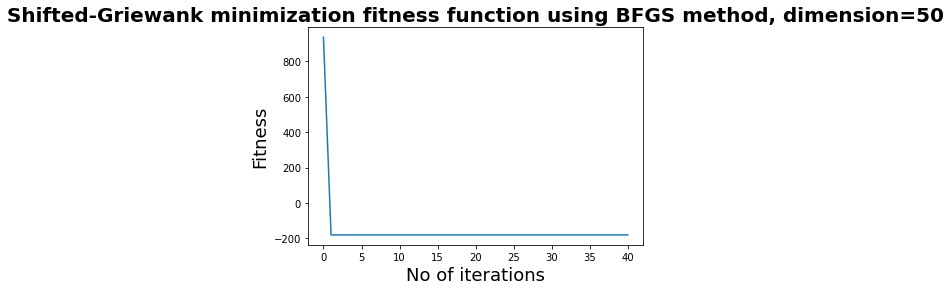

In [26]:
# Plot value of the fitness function 
plt.title("Shifted-Griewank minimization fitness function using BFGS method, dimension=50",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history)

Let's now optimize the sphere function at dimension 500 using again the BFGS algorithm

In [34]:
#Define dimension, shift and initial solution proposal
d500 = 500
shift  = np.random.uniform(-100,100,d500)
x_0_500 = np.random.uniform(-100,100,d500)

In [35]:
# Define the boundairies of the shifted sphere function
min_bound_500 = -100 * np.ones(d500)
max_bound_500 = 100 * np.ones(d500)
bounds_500 = list(zip(min_bound_500, max_bound_500))

In [46]:
start_time = time.time()
res_500 = minimize(shifted_griewank,method='Powell',callback=callbackf,bounds=bounds_500,x0=x_0_500, options={'disp': True, 'maxiter': MAX_ITER})
print("--- %s seconds ---" % (time.time() - start_time))

Optimization terminated successfully.
         Current function value: -179.023900
         Iterations: 3
         Function evaluations: 30350
--- 82.88748812675476 seconds ---


In [47]:
#Print result of the optimization in dimension 500
res_500

   direc: array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])
     fun: -179.02389950529871
 message: 'Optimization terminated successfully.'
    nfev: 30350
     nit: 3
  status: 0
 success: True
       x: array([ 19.49832571, -50.87410149,  92.98271707, -78.24669973,
       -24.34465525,  14.90761183,  35.11001334, -27.61407577,
       -76.99815615, -40.00947973,  53.14742513, -41.93494359,
        78.5178662 , -61.33003315, -79.80858648, -16.05686758,
       -90.77953595, -83.04063525,  41.92365112,  58.7364924 ,
        34.65900912,  16.52198396, -68.86501508, -46.1562447 ,
       -67.5954246 , -50.9667252 ,  87.5339075 ,  39.76824657,
        78.51904212,  -3.199508  ,  35.88625708, -82.50168536,
        90.30634977,  78.73342727, -93.85334633, -37.45695133,
         6.00513903,  26.19296477,   

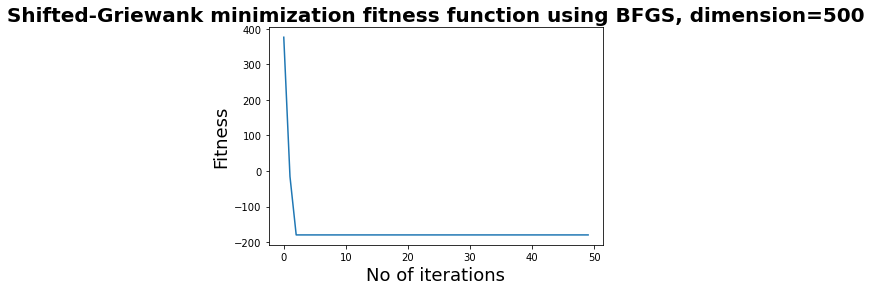

In [49]:
# Plot value of the fitness function 
plt.title("Shifted-Griewank minimization fitness function using BFGS, dimension=500",fontsize=20,fontweight='bold')
plt.xlabel("No of iterations",fontsize=18)
plt.ylabel("Fitness",fontsize=18)

plt.plot(history[:50])

The stopping criterion is the tol (set in our case at 1e-5) meaning the gradient norm must be less than this threshold before successful termination.

The selected algorithm for this task is the Powell method. It belongs to the conjugate gradient methods it uses bounds and providing gradients is not necessary.